In [10]:
import csv
import numpy as np

In [11]:
infile = 'Price_of_Gasoline.XL.csv'

In [12]:
# create new empty lists:  years and prices come from data
yearsList = []
pricesList = []
# names of months for labeling results
monthList = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [13]:
# read the data
with open(infile, 'rU') as csvfile:
    # the csv file reader returns a list of the csv items on each line - note delimiter is comma
    priceReader = csv.reader(csvfile,  dialect='excel', delimiter=',')

    # from each line, a list of row items, make separate lists for years and for the prices
    for line in priceReader:
      # skip lines without data
      if line[0] == '' or line[0].startswith('Price') or line[0].startswith('Year'):
          continue
      else:
          try:
            # add the year to list
            yearsList.append(line[0])
            # append the prices (as strings) to the list
            pricesList.append(line[1:])
          except IndexError:
            print ('Error: ', line)
csvfile.close()

print ("Read", len(yearsList), "years of prices")


Read 29 years of prices


/var/folders/t6/r78__dnn0sjgvvll0tn49gn80000gn/T/ipykernel_3751/1219454318.py:2: DeprecationWarning: 'U' mode is deprecated
  with open(infile, 'rU') as csvfile:


In [14]:
# make a numpy array for the strings
data = np.array(pricesList)
print('Shape of Prices data', data.shape)

Shape of Prices data (29, 12)


In [15]:

# convert the empty strings to strings of zeros, using a Boolean mask to find empty strings
data[data == ''] = '0'

In [16]:
# now we can convert the whole thing to float without getting conversion errors for the empty strings
prices = data.astype(np.float)

/var/folders/t6/r78__dnn0sjgvvll0tn49gn80000gn/T/ipykernel_3751/2335793324.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prices = data.astype(np.float)


In [17]:
# compute the average price for each month (or use mean)
# sum along the columns
monthTotalPrices = np.sum(prices, axis = 0)
# divide by number of years to get average
monthAveragePrices = monthTotalPrices / len(yearsList)

In [18]:
#print(monthAveragePrices)
print ("\nAverage gas price for each month\n"

SyntaxError: unexpected EOF while parsing (2315669058.py, line 2)

In [19]:
# print the average price for each month
for i, mon in enumerate(monthList):
	print (mon, ':', monthAveragePrices[i])

Jan : 1.1036206896551726
Feb : 1.1087241379310342
Mar : 1.1187241379310344
Apr : 1.1476551724137933
May : 1.1760344827586207
Jun : 1.1868275862068964
Jul : 1.1751379310344825
Aug : 1.177241379310345
Sep : 1.1887241379310345
Oct : 1.1105172413793105
Nov : 1.1011724137931032
Dec : 1.0836551724137933


In [20]:
# compute the average price for each year up to the last one with missing data
# sum along the rows
yearTotalPrices = np.sum(prices, axis = 1)
# divide by number of months to get average
yearAveragePrices = yearTotalPrices / 12

In [21]:

#print(monthAveragePrices)
print ("\nAverage gas price for each year\n")


Average gas price for each year



In [22]:
# print the 
for i, year in enumerate(yearsList[ :-1]):
  print (year ,':', yearAveragePrices[i])



1976 : 0.6143333333333333
1977 : 0.6563333333333333
1978 : 0.6702500000000001
1979 : 0.90325
1980 : 1.2451666666666668
1981 : 1.3782499999999998
1982 : 1.2954999999999999
1983 : 1.2411666666666668
1984 : 1.2122499999999998
1985 : 1.20175
1986 : 0.9274166666666667
1987 : 0.9484166666666666
1988 : 0.9461666666666667
1989 : 1.0221666666666667
1990 : 1.1643333333333334
1991 : 1.1400833333333333
1992 : 1.1264999999999998
1993 : 1.1079166666666667
1994 : 1.1118333333333332
1995 : 1.1471666666666664
1996 : 1.2309166666666667
1997 : 1.2336666666666665
1998 : 1.0593333333333335
1999 : 1.1650833333333332
2000 : 1.51
2001 : 1.4610000000000003
2002 : 1.3575
2003 : 1.5907499999999999


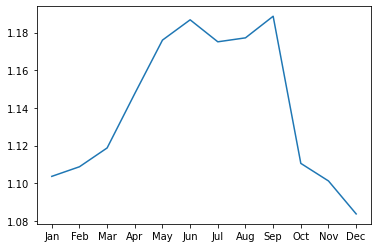

In [23]:
# or display the monthly averages as a simple plot

import matplotlib.pyplot as pp

x = np.arange(12)
pp.xticks(x,monthList)
pp.plot(x, monthAveragePrices)
pp.show()



ValueError: The number of FixedLocator locations (28), usually from a call to set_ticks, does not match the number of ticklabels (29).

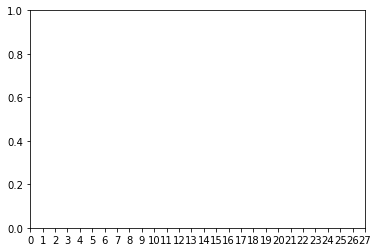

In [24]:
# or we can also display the years with a simple plot
x = np.arange(len(yearsList)-1)
pp.xticks(x,yearsList)
pp.plot(x, yearAveragePrices[:-1])
pp.show()

# Done!